# Group Project Report: How do Song Statistics and Other Musical Elements Correlate to the Number of Spotify Streams?
#### Xuyang Chen, Rachel Weng, Martin Wong, Seabert Yuan
## Introduction
Spotify is a digital music streaming service that allows users to access millions of songs on various devices, including computers, phones, and cars. As of 2024, Spotify is documented as the world’s most popular streaming service, with 350 million active users and 150 million premium subscribers. [(Source)](https://www.cnn.com/cnn-underscored/reviews/best-music-streaming-service#:~:text=Spotify%20is%20the%20most%20popular,users%20and%20150%20million%20subscribers.)

Our project aims to answer the following question: ***How do song statistics and other musical elements correlate to the number of Spotify streams?***

The dataset, from [(Kaggle)](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data), documents the most streamed Spotify songs globally of 2023 obtained using the Spotify API and provides an abundance of information about both the song’s background and musicality. A stream is defined as a user listening to a song for more than 30 seconds. The dataset also provides percentage values from a range of 0 - 100 % of danceability, defined as a track’s suitability for dancing based on musical factors such as tempo, beat strength, rhythmic stability, and overall regularity.

## Methods and Results

### Preliminary Exploratory Data Analysis

An exploration into the relationships between various variables and the number of Spotify streams will be expored to determine which variables should be used as predictors for our regression model. We begin by importing the necessary libraries.

In [1]:
library(tidyverse)
library(tidymodels)
library(reshape2)
library(repr)
options(repr.matrix.max.rows = 8)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### Reading the Data from the web Into R

After uploading our onto github, it can be read using R's `read_csv()` function.

In [2]:
spotify_data <- read_csv("https://raw.githubusercontent.com/martin0wong/dsci100_project/main/data/spotify-2023.csv")
spotify_data

Rows: 953 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): track_name, artist(s)_name, streams, key, mode
dbl (17): artist_count, released_year, released_month, released_day, in_spot...
num  (2): in_deezer_playlists, in_shazam_charts

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,⋯,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,⋯,125,B,Major,80,89,83,31,0,8,4
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,⋯,92,C#,Major,71,61,74,7,0,10,4
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,⋯,138,F,Major,51,32,53,17,0,31,6
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,⋯,170,A,Major,55,58,72,11,0,11,15
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,⋯,166,F#,Major,42,7,24,83,1,12,6
A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,⋯,92,C#,Major,80,81,67,4,0,8,6
En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,⋯,97,C#,Major,82,67,77,8,0,12,5
Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,⋯,90,E,Minor,61,32,67,15,0,11,5


### Cleaning and Wrangling

Generally, the data is tidy. We can however, change the names of the columns for clarity and ensure that each column is using the right data type. Since the `released_` columns do not mean too much for us, we convert them into the number of days from the release day until December 31, 2023 inclusive. This value, calculated by using average days in a year and in a month, gives the number of days the song has been released for. We will then remove any observations that contain missing data as observations missing data may impact correlations within other variables. Finally, we will only select columns useful for visualization dropping columns such as the `track_name` or the `artist(s)_name`.

In [3]:
colnames(spotify_data) <- c("track_name", "artist(s)_name", "artist_count", "released_year", "released_month", "released_day", 
                                    "in_spotify_playlists", "in_spotify_charts", "streams", "in_apple_playlists", "in_apple_charts", 
                                    "in_deezer_playlists", "in_deezer_charts", "in_shazam_charts", "bpm", "key", "mode", 
                                    "danceability_percent", "valence_percent", "energy_percent", 
                                    "acousticness_percent", "instrumentalness_percent", "liveness_percent", "speechiness_percent")
spotify_data_wrangled <- spotify_data |>
                         mutate(key = as.factor(key)) |>
                         mutate(mode = as.factor(mode)) |>
                         #avg days in a year/month searched from web
                         mutate(days_released = round((2023-released_year)*365.25 + (12-released_month)*30.436875 + (30.436875-released_day), 0)) |>
                         mutate(across(streams:bpm, as.numeric)) |>
                         mutate(streams = streams/1000000) |>
                         drop_na() |>
                         #removing released_xxx columns as wrangled into days_released
                         select(track_name:artist_count, in_spotify_playlists:days_released)
spotify_data_wrangled

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(streams:bpm, as.numeric)`.
Caused by warning:
! NAs introduced by coercion”


track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,⋯,key,mode,danceability_percent,valence_percent,energy_percent,acousticness_percent,instrumentalness_percent,liveness_percent,speechiness_percent,days_released
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,553,147,141.3817,43,263,45,10,⋯,B,Major,80,89,83,31,0,8,4,169
LALA,Myke Towers,1,1474,48,133.7163,48,126,58,14,⋯,C#,Major,71,61,74,7,0,10,4,281
vampire,Olivia Rodrigo,1,1397,113,140.0040,94,207,91,14,⋯,F,Major,51,32,53,17,0,31,6,183
Cruel Summer,Taylor Swift,1,7858,100,800.8408,116,207,125,12,⋯,A,Major,55,58,72,11,0,11,15,1590
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Bigger Than The Whole Sky,Taylor Swift,1,1180,0,121.87187,4,0,8,0,⋯,F#,Major,42,7,24,83,1,12,6,436
A Veces (feat. Feid),"Feid, Paulo Londra",2,573,0,73.51368,2,0,7,0,⋯,C#,Major,80,81,67,4,0,8,6,423
En La De Ella,"Feid, Sech, Jhayco",3,1320,0,133.89561,29,26,17,0,⋯,C#,Major,82,67,77,8,0,12,5,437
Alone,Burna Boy,1,782,2,96.00739,27,18,32,1,⋯,E,Minor,61,32,67,15,0,11,5,422


### Exploratory Data Analysis

First we set the seed for reproducibility. We will split the wrangled data such that 75% of the data will be used for training and the remaining 25% for testing. Then we summarize our data showing the average values for a certain bpm.

In [4]:
set.seed(15)
spotify_split <- initial_split(spotify_data_wrangled, prop = 0.75, strata = streams)
spotify_train <- training(spotify_split)
spotify_test <- testing(spotify_split)

spotify_summary <- merge(spotify_train |> group_by(bpm) |> summarize(across(in_spotify_playlists:in_apple_charts ,mean)),
                         spotify_train |> group_by(bpm) |> summarize(across(danceability_percent:days_released ,mean)))
spotify_summary <- merge(spotify_summary, spotify_train |> group_by(bpm) |> summarize(count = n()) |> arrange(bpm) |> select(bpm,count))
spotify_summary

bpm,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,danceability_percent,valence_percent,energy_percent,acousticness_percent,instrumentalness_percent,liveness_percent,speechiness_percent,days_released,count
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
65,1127,0,110.84905,16,63,71,55,26,85,0,13,8,387,1
67,3408,47,518.74511,87,86,53,50,53,23,0,44,7,311,1
71,461,0,94.61649,7,11,59,70,74,56,0,11,40,667,1
72,1480,0,61.73984,1,0,56,56,47,76,0,8,36,596,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
198,3506,56,373.2000,105,64,59,71,42,55,0,10,7,394,1
202,8879,0,663.8321,182,107,24,76,60,77,0,12,4,21992,1
204,2420,19,429.8298,52,107,52,52,68,46,0,15,4,334,1
206,8448,23,882.8312,160,110,43,50,55,50,0,15,10,4382,1


With our training data, we can visualize how each predictor affects the number of Spotify streams.

In [5]:
spotify_charts <- spotify_train |>
                  select(in_spotify_charts, in_apple_charts, streams)
spotify_playlists <- spotify_train |>
                  select(in_spotify_playlists, in_apple_playlists, streams)
spotify_music <- spotify_train |>
                 select(bpm, days_released, danceability_percent, streams)

We first add the cowplot library to combine all plots with each column on the x-axis and the number of streams on Spotify on the y-axis to visualize how relevant certain variables are on the number of streams.

In [6]:
library(cowplot)

spotify_charts_plot <- spotify_charts |>
                        ggplot(aes(x= in_spotify_charts, y=streams)) +
                        labs(x = "Number of occurrences in Spotify charts", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
apple_charts_plot <- spotify_charts |>
                        ggplot(aes(x=in_apple_charts, y=streams)) +
                        labs(x = "Number of occurrences in Apple charts", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
charts_title <- ggdraw() + draw_label("Number of Spotify Streams Compared to Track Appearances on Various Platforms' Charts", fontface='bold')
charts_plots <- plot_grid(spotify_charts_plot, apple_charts_plot, ncol=2)
charts_plot <- plot_grid(charts_title, charts_plots, ncol=1, rel_heights=c(0.1, 1))

Warning message:
“package ‘cowplot’ was built under R version 4.3.2”

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




In [7]:
spotify_playlists_plot <- spotify_playlists |>
                        ggplot(aes(x=in_spotify_playlists, y=streams)) +
                        labs(x = "Number of occurrences in Spotify playlists", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
apple_playlists_plot <- spotify_playlists |>
                        ggplot(aes(x=in_apple_playlists, y=streams)) +
                        labs(x = "Number of occurrences in Apple playlists", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
playlists_title <- ggdraw() + draw_label("Number of Spotify Streams Compared to Track Appearances on Various Platforms' Playlists", fontface='bold')
playlists_plots <- plot_grid(spotify_playlists_plot, apple_playlists_plot, ncol=2)
playlists_plot <- plot_grid(playlists_title, playlists_plots, ncol=1, rel_heights=c(0.1, 1))

In [8]:
bpm_plot <- spotify_music |>
                        ggplot(aes(x=bpm, y=streams)) +
                        labs(x = "Track's Beats per Minute (BPM)", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
released_plot <- spotify_music |>
                        ggplot(aes(x=days_released, y=streams)) +
                        labs(x = "Days Since Release", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
danceability_plot <- spotify_music |>
                        ggplot(aes(x=danceability_percent, y=streams)) +
                        labs(x = "Percent Describing the Track's Danceability (%)", y = "Number of streams on Spotify (in million)") +
                        theme(text = element_text(size = 14)) +
                        geom_point(alpha = 0.25)
track_title <- ggdraw() + draw_label("Number of Spotify Streams Compared to Track's Various Properties", fontface='bold')
track_plots <- plot_grid(bpm_plot, released_plot, danceability_plot, ncol=3)
track_plot <- plot_grid(track_title, track_plots, ncol=1, rel_heights=c(0.1, 1))

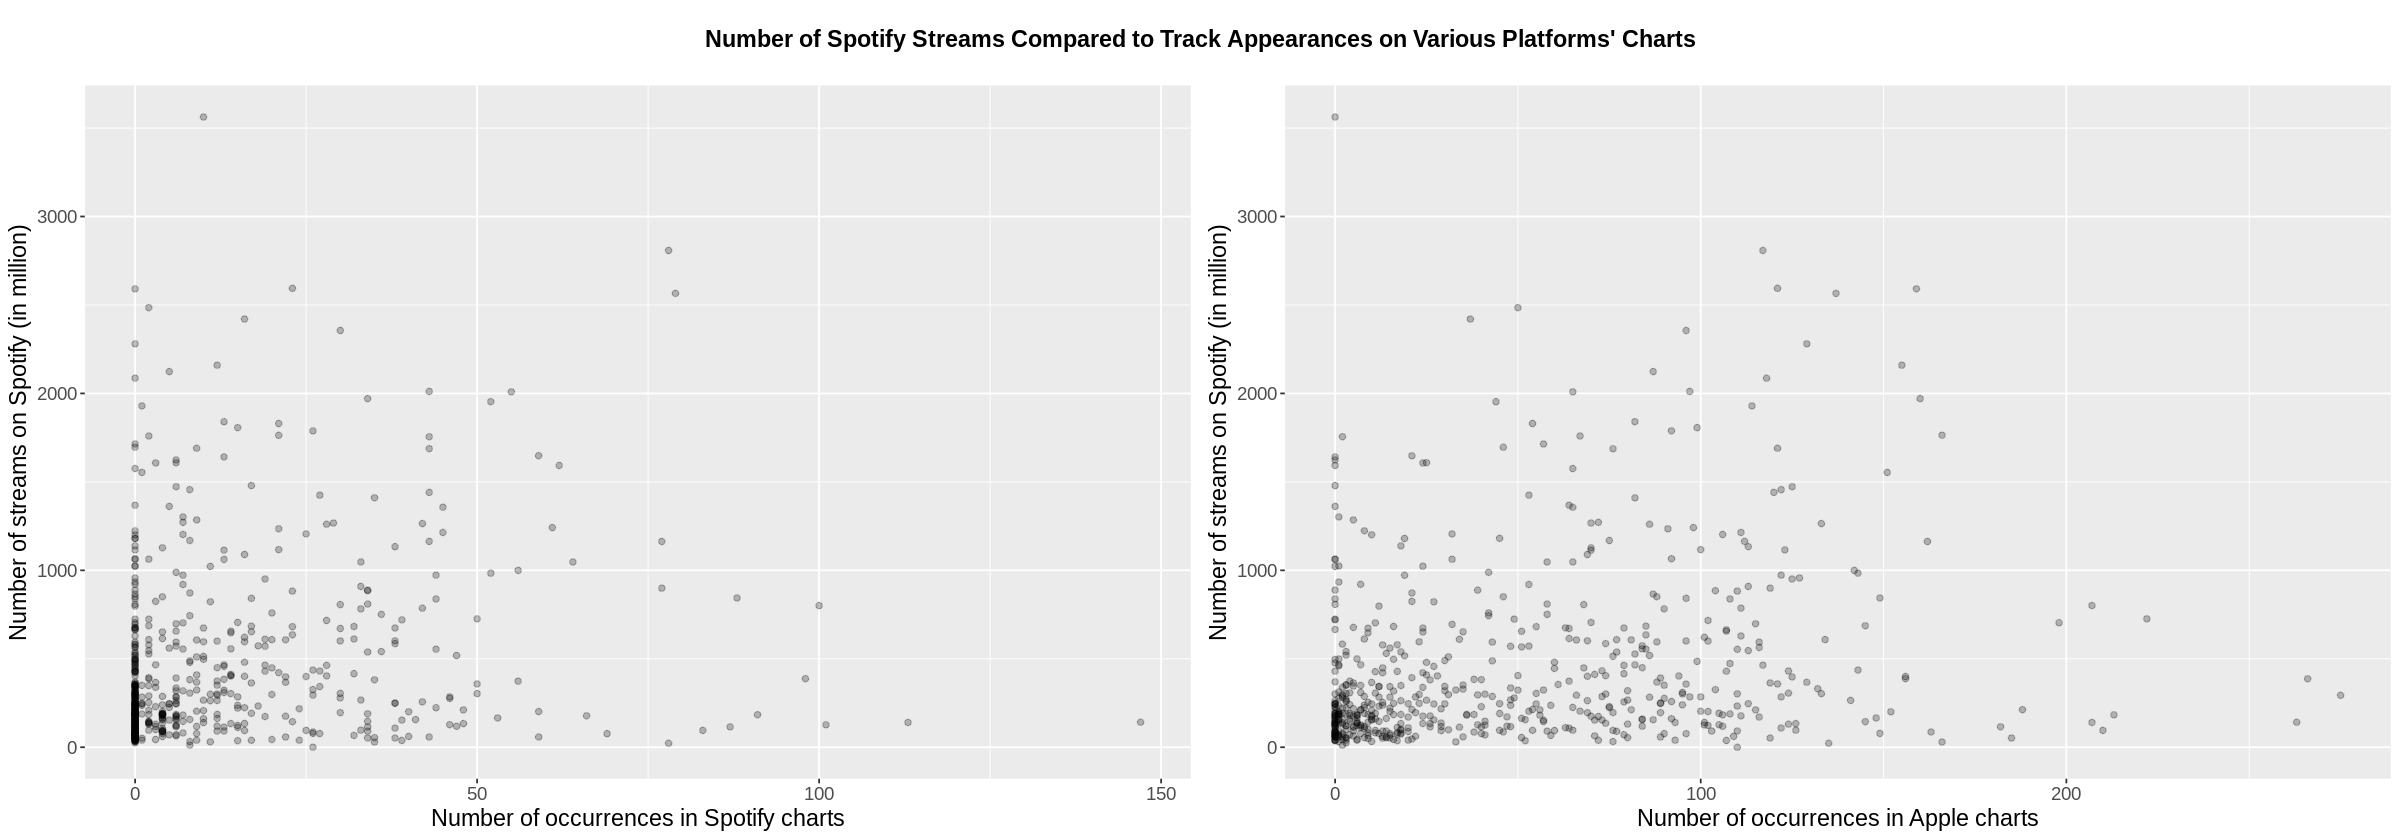

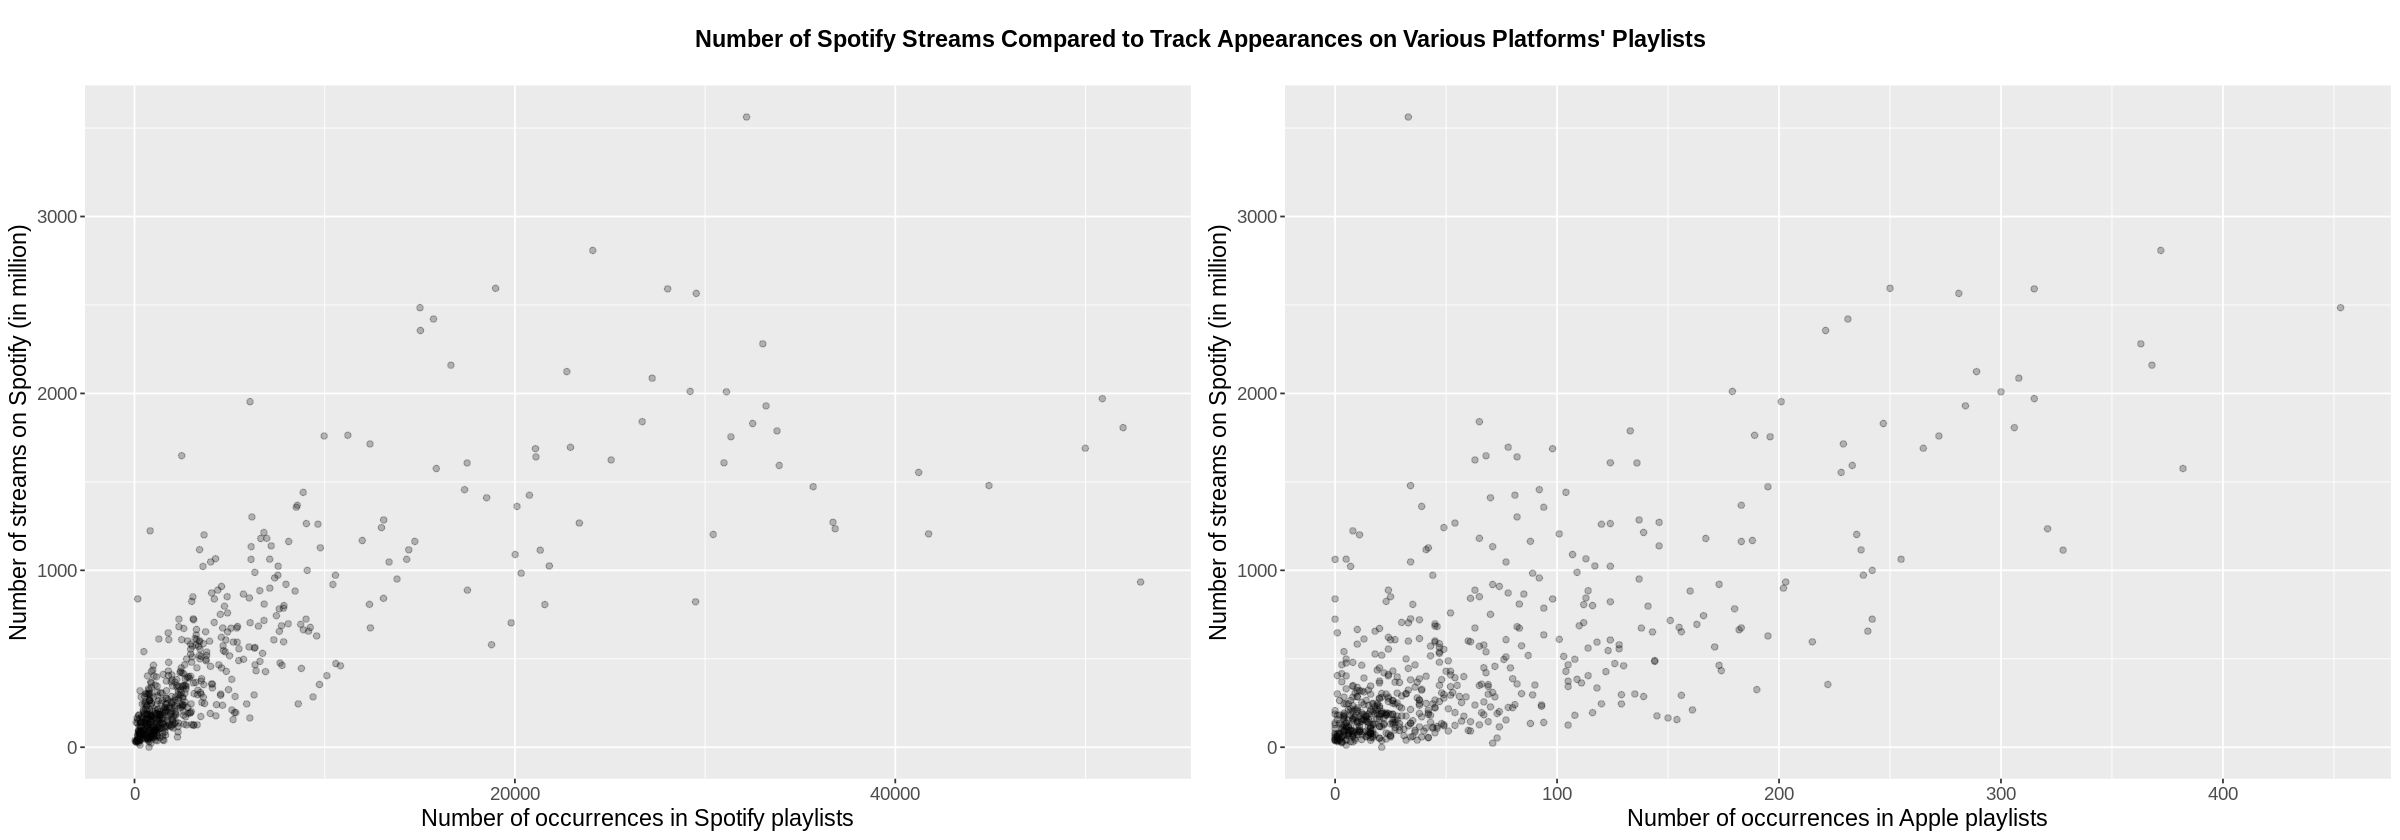

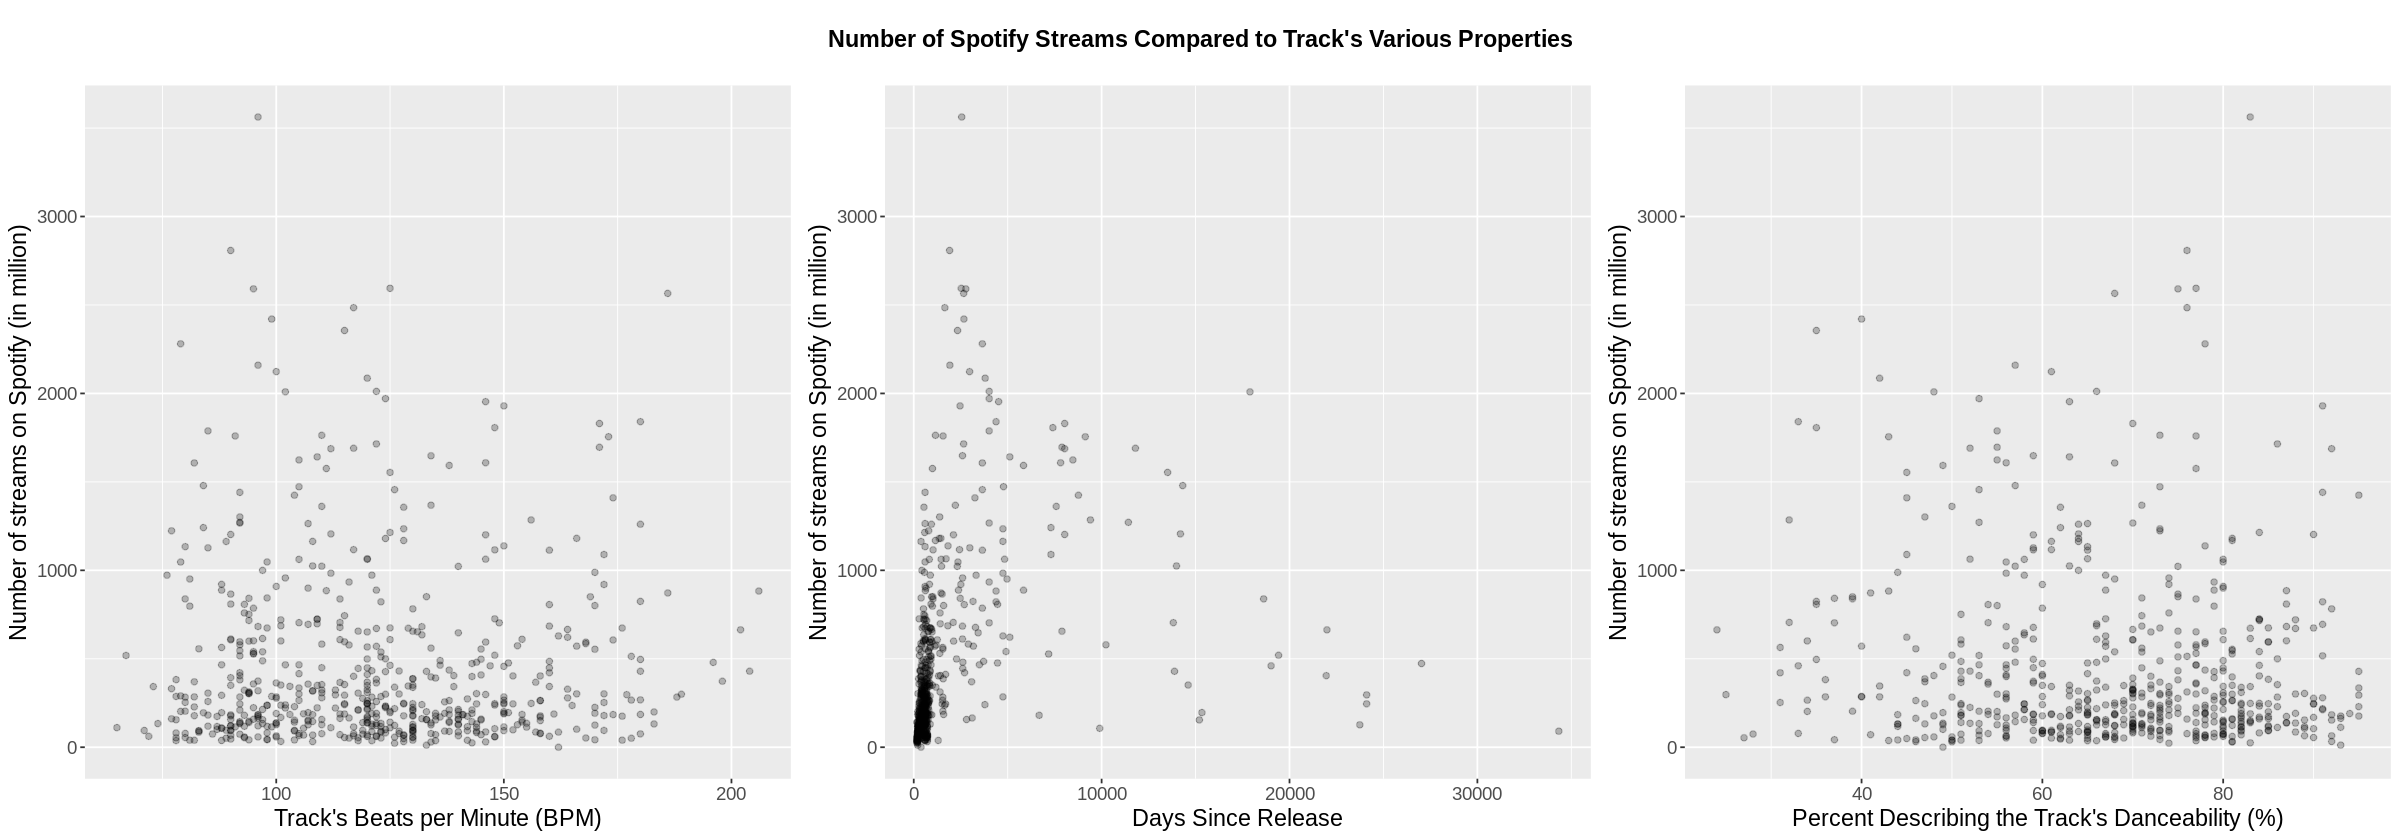

In [9]:
options(repr.plot.height = 7, repr.plot.width = 20)
charts_plot
playlists_plot
track_plot